# UEA&UCR Dataset clustering with TIMEX CLUSTERING
In this notebook we will see how to use TIMEX CLUSTERING to automatically create the clusters for several time series by using k-means algorithm and different distance measures: ED, DWT and soft-DWT.

Now, this is just to show the capabilities of TIMEX CLUSTERING and to give an example of code employing TIMEX CLUSTERING. The assumption here is that the few time series are used, which perfectly fits to use this kind of approach by using raw data directly and without an specific and necessary feature extraction.

In this notebook we will use the data from the the library [tslearn.datasets](CacheDatasets), which release a desire number of time series of a defined number of clusters. TIMEX CLUSTERING will be use without the knowledge of the number of clusters that contained the data, by performing the clustering TIMEX CLUSTERING automatically will find the best number of clusters that grouped the data. Some changes were made to the downloaded CSV:
- only 50 time series from 3 clusters were taken;
- it was taken the length of the timeseries to 40.

The data looks like this, before being re-ordered in crescent orded:

![overview](https://github.com/uGR17/TIMEX_CLUSTERING/blob/main/examples/figures/ObservationBased/k_means_example_5ts.PNG?raw=1)



We will focus on all the columns (50 time series): `date`,  contain the time-stamps of the time-series, and `ts#`, which is the nth time series.

We will see how to automatize all the ingestion and clustering tasks.

## TIMEX CLUSTERING Configuration Dictionary
The most important aspects of TIMEX CLUSTERING can be configured with a simple Python dictionary (or, if you prefer, a JSON file which can be loaded at runtime).

For this task, we could use a dictionary similar to this:

In [ ]:
param_config_kmeans = {
  "activity_title": "UEA&UCR Dataset - Clustering Example",
  "verbose": "INFO",
  "input_parameters": {
    "source_data_url": "https://raw.githubusercontent.com/uGR17/TIMEX_CLUSTERING/main/examples/datasets/k_means_example_5ts.csv",
    "index_column_name": "date",  # Use this column as index
    "frequency": "D",  # Data has a daily frequency; TIMEX can infer it, but if it is known it can be defined.
    "timeseries_names":{ # Dictionary of key-values (old_name: new_name) used to rename some columns in the CSV
      "date": "Date",
      "ts1": "timeseries1",
      "ts2": "timeseries2",
      "ts3": "timeseries3",
      "ts4": "timeseries4",
      "ts5": "timeseries5",
    }
  },
  "model_parameters": {
     "clustering_approach": "observation_based,feature_based,model_based",  # Clustering approach which will be tested.  
     "models": "k_means,gaussian_mixture",  # Model(s) which will be tested. Models available: for Observation_based(k_means), for Feature_based(k_means) and Model_based(gaussian_mixture)
     "pre_transformation": "none",  # Only one data preprocesing transformation to test, for Feature Based clustering approach, i.e.: none,log or log_modified
     "distance_metric": "euclidean,dtw,softdtw",  # softdtw Distance/similarity measure which will be tested, i.e.: euclidean,dtw,softdtw
     "feature_transformations": "DWT",  # Feature transformations to test, fonly for the Feature Based clustering approach, i.e.: DWT,DFT
     "n_clusters": [3, 4, 5, 6],  # List of number of clusters settings to search, for the non-hierarchical clustering models.
     "gamma": 0.01,  # Regularization parameter for the soft DWT metric, lower is less smoothed (closer to true DTW).
     "main_accuracy_estimator": "silhouette"  # Use the Silhouette score as main metric to measure accuracy.
  },
  "visualization_parameters": {
    "xcorr_graph_threshold": 0.8,
  }
}

## Launch TIMEX CLUSTERING!
Launching TIMEX CLUSTERING is as simple as running few lines of code. Note that this may require a minute or two to be installed...

In [ ]:
pip install timexseries_clustering

In [ ]:
import logging
import sys
logging.basicConfig(level=logging.INFO, stream=sys.stdout)
logger = logging.getLogger(__name__)

from timexseries_clustering.data_ingestion import ingest_timeseries
from timexseries_clustering.data_clustering.pipeline import create_timeseries_containers

ingested_dataset = ingest_timeseries(param_config_kmeans)

INFO:timexseries_clustering.data_ingestion:Starting the data ingestion phase.
INFO:timexseries_clustering.data_ingestion:Finished the data-ingestion phase. Some stats:
-> Number of rows: 40
-> Number of columns: 50
-> Column names: ['timeseries1', 'timeseries2', 'timeseries3', 'timeseries4', 'timeseries5', 'ts6', 'ts7', 'ts8', 'ts9', 'ts10', 'ts11', 'ts12', 'ts13', 'ts14', 'ts15', 'ts16', 'ts17', 'ts18', 'ts19', 'ts20', 'ts21', 'ts22', 'ts23', 'ts24', 'ts25', 'ts26', 'ts27', 'ts28', 'ts29', 'ts30', 'ts31', 'ts32', 'ts33', 'ts34', 'ts35', 'ts36', 'ts37', 'ts38', 'ts39', 'ts40', 'ts41', 'ts42', 'ts43', 'ts44', 'ts45', 'ts46', 'ts47', 'ts48', 'ts49', 'ts50']
-> Number of missing data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
display(ingested_dataset.head(5))

,timeseries1,timeseries2,timeseries3,timeseries4,timeseries5,ts6,ts7,ts8,ts9,ts10,...,ts41,ts42,ts43,ts44,ts45,ts46,ts47,ts48,ts49,ts50
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.70,0.78,-1.45,0.75,-2.03,0.67,0.58,0.65,0.68,-1.35,...,0.55,0.63,0.62,0.54,0.75,0.61,-1.45,0.76,-1.38,0.67
2020-02-26,0.67,0.77,-1.48,0.76,-2.12,0.73,0.60,0.61,0.63,-1.37,...,0.54,0.60,0.63,0.58,0.75,0.63,-1.40,0.78,-1.36,0.57
2020-02-27,0.66,0.74,-1.50,0.78,-2.13,0.71,0.59,0.56,0.68,-1.39,...,0.59,0.61,0.63,0.59,0.75,0.67,-1.39,0.80,-1.37,0.65
2020-02-28,0.64,0.79,-1.52,0.71,-2.09,0.77,0.62,0.58,0.69,-1.44,...,0.61,0.60,0.61,0.53,0.71,0.60,-1.42,0.80,-1.36,0.59
2020-02-29,0.69,0.78,-1.51,0.68,-2.12,0.69,0.56,0.58,0.67,-1.39,...,0.61,0.59,0.61,0.56,0.69,0.59,-1.41,0.78,-1.37,0.63


### K_MEANS

Launch the clustering for all non-index column in the dataset, in this case 50 time series. This take just a minute because the time series are few and they have short length. If will use data day by day, starting from the 2020-02-25, in order to get the best available clustering using the data available to that day.

In [ ]:
from timexseries_clustering.data_visualization.functions import timeseries_plot

ingested_dataset_plot = timeseries_plot(ingested_dataset)
ingested_dataset_plot.figure

A TimeSeriesContainer is a container for all the time-series: it contains its raw data, models results, xcorr, etc. Let's inspect this object:

In [ ]:
timeseries_containers = create_timeseries_containers(ingested_dataset, param_config_kmeans) #Time with xcorr: 10 min, without xcorr:

INFO:timexseries_clustering.data_clustering.pipeline:Using approach: observation_based and using model k_means...
INFO:timexseries_clustering.data_clustering.pipeline:Computing univariate clustering using approach: observation_based, number of clusters: 3, distance metric: euclidean and transformation: none...
INFO:timexseries_clustering.data_clustering.pipeline:Computing univariate clustering using approach: observation_based, number of clusters: 4, distance metric: euclidean and transformation: none...
INFO:timexseries_clustering.data_clustering.pipeline:Computing univariate clustering using approach: observation_based, number of clusters: 5, distance metric: euclidean and transformation: none...
INFO:timexseries_clustering.data_clustering.pipeline:Computing univariate clustering using approach: observation_based, number of clusters: 6, distance metric: euclidean and transformation: none...
INFO:timexseries_clustering.data_clustering.pipeline:For the metric: euclidean the best cluste

The first attribute of the container is the `timeseries_data`. This contains the data only relative to the container time-series:

In [ ]:
timeseries_data = timeseries_containers[0].timeseries_data
display(timeseries_data.head(5))

,timeseries1,timeseries2,timeseries3,timeseries4,timeseries5,ts6,ts7,ts8,ts9,ts10,...,ts41,ts42,ts43,ts44,ts45,ts46,ts47,ts48,ts49,ts50
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.70,0.78,-1.45,0.75,-2.03,0.67,0.58,0.65,0.68,-1.35,...,0.55,0.63,0.62,0.54,0.75,0.61,-1.45,0.76,-1.38,0.67
2020-02-26,0.67,0.77,-1.48,0.76,-2.12,0.73,0.60,0.61,0.63,-1.37,...,0.54,0.60,0.63,0.58,0.75,0.63,-1.40,0.78,-1.36,0.57
2020-02-27,0.66,0.74,-1.50,0.78,-2.13,0.71,0.59,0.56,0.68,-1.39,...,0.59,0.61,0.63,0.59,0.75,0.67,-1.39,0.80,-1.37,0.65
2020-02-28,0.64,0.79,-1.52,0.71,-2.09,0.77,0.62,0.58,0.69,-1.44,...,0.61,0.60,0.61,0.53,0.71,0.60,-1.42,0.80,-1.36,0.59
2020-02-29,0.69,0.78,-1.51,0.68,-2.12,0.69,0.56,0.58,0.67,-1.39,...,0.61,0.59,0.61,0.56,0.69,0.59,-1.41,0.78,-1.37,0.63


The second and fourth attribute are the `clustering_approach` and `best_model`. This contains the kind of clustering approach used, relative to the container time-series; as well as the characteristics of the best model found for that clustering approach. In TIMEX CLUSTERING can be used three different clustering appraoches: Observation based, Feature based or Model based clustering of time-series.

In [ ]:
clustering_approach = timeseries_containers[0].approach
print(type(clustering_approach))
print(clustering_approach)

best_model = timeseries_containers[0].best_model
small_dict_keys = ("clustering_approach","model","distance_metric","n_clusters","feature_transformation","pre_transformation") #To show only some of the information of the best_model
best_model_small = { key: best_model[key] for key in small_dict_keys}
print(type(best_model))
print(best_model_small)

<class 'str'>
Observation based
<class 'dict'>
{'clustering_approach': 'observation_based', 'model': 'k_means', 'distance_metric': 'softdtw', 'n_clusters': 3, 'feature_transformation': 'none', 'pre_transformation': 'none'}


The third attribute is `models`. This is a dictionary which contains an entry for each employed model (in this case only `k_means`) with its corresponding distance/similarity metric. For each model and metric, in a ModelResult [ModelResult](https://github.com/uGR17/TIMEX_CLUSTERING/blob/main/timexseries_clustering/data_clustering/models/predictor.py#L38) object the results and information of the clustering are contained, in this object it can be found i.e. a numpy array object, defining to which cluster belongs each time-series of the dataset and more information as it's shown in the following.



In [ ]:
timeseries_models_results = timeseries_containers[0].models
print(type(timeseries_models_results))
print(timeseries_models_results)

<class 'dict'>
{'k_means': {'euclidean': <timexseries_clustering.data_clustering.models.predictor.ModelResult object at 0x7f62c7ce8d50>, 'dtw': <timexseries_clustering.data_clustering.models.predictor.ModelResult object at 0x7f62c5136b50>, 'softdtw': <timexseries_clustering.data_clustering.models.predictor.ModelResult object at 0x7f62c4d64690>}}


In [ ]:
kmeans_ED_model_results = timeseries_models_results['k_means']['euclidean']
print(kmeans_ED_model_results)

Each ModelResult has:
  - an array that contains the results of the **best clustering** for the **specified metric**, it contains the indexes of the cluster that each time series belongs to, which is automatically selected using the best model parameters (best number of clusters and transformation).
  - a list of [SingleResult](https://github.com/uGR17/TIMEX_CLUSTERING/blob/main/timexseries_clustering/data_clustering/models/predictor.py#L20) objects, each one c]
  - a dictionary containing **information of the best model**, apporach, model, metric, best number of cluster, best transformation.
  - a DataFrame, containing the **cluster centers** of each cluster obtained using the best model parameters.


Let's inspect them:

In [ ]:
best_clustering = kmeans_ED_model_results.best_clustering
print(type(best_clustering))
print(best_clustering)

<class 'numpy.ndarray'>
[0 2 1 0 1 0 0 0 0 1 1 1 0 0 2 1 0 0 2 1 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2
 0 0 0 2 0 0 2 0 0 1 0 1 0]


In [ ]:
kmeans_ED_results = kmeans_ED_model_results.results
print(type(kmeans_ED_results))
print(kmeans_ED_results)

<class 'list'>
[<timexseries_clustering.data_clustering.models.predictor.SingleResult object at 0x7f62c7ce8950>, <timexseries_clustering.data_clustering.models.predictor.SingleResult object at 0x7f62c7cfa490>, <timexseries_clustering.data_clustering.models.predictor.SingleResult object at 0x7f62c7cd6a50>, <timexseries_clustering.data_clustering.models.predictor.SingleResult object at 0x7f62c7d45310>]


Each SingleResult contains the **characteristics** and **performances** obtained using different number of clusters and transformation


In [ ]:
print('First element(SingleResult) of the list:')
print(kmeans_ED_results[0].characteristics)
print(kmeans_ED_results[0].performances.get_dict())
print('Second element(SingleResult) of the list:')
print(kmeans_ED_results[1].characteristics)
print(kmeans_ED_results[1].performances.get_dict())

First element(SingleResult) of the list:
{'clustering_approach': 'Observation based', 'model': 'K Means', 'distance_metric': 'Euclidean', 'n_clusters': 3, 'feature_transformation': 'none', 'pre_transformation': 'none'}
{'silhouette': 0.447842133577781, 'davies_bouldin': 0.8280085848198744, 'calinski_harabasz': 50.67867335230394}
Second element(SingleResult) of the list:
{'clustering_approach': 'Observation based', 'model': 'K Means', 'distance_metric': 'Euclidean', 'n_clusters': 4, 'feature_transformation': 'none', 'pre_transformation': 'none'}
{'silhouette': 0.3835960335646916, 'davies_bouldin': 0.8565725094435519, 'calinski_harabasz': 36.15057949457212}


**Characteristics** and **cluster_centers** of the **best clustering** for the model and metric specified. 

In [ ]:
kmeans_ED_characts = kmeans_ED_model_results.characteristics
print(kmeans_ED_characts)

{'clustering_approach': 'Observation based', 'model': 'K Means', 'distance_metric': 'Euclidean', 'n_clusters': 3, 'feature_transformation': 'none', 'pre_transformation': 'none'}


In [ ]:
single_results = kmeans_ED_model_results.cluster_centers
print(type(single_results))
print(single_results.shape)
display(single_results.tail(5))

<class 'pandas.core.frame.DataFrame'>
(40, 3)


,0,1,2
2020-03-31,0.603704,0.697143,0.628889
2020-04-01,0.612963,0.682857,0.624444
2020-04-02,0.625556,0.665714,0.643333
2020-04-03,0.645556,0.683571,0.622222
2020-04-04,0.642222,0.670714,0.643333


We may plot this using TIMEX-CLUSTERING built-in visualization functions or use another plotting library of your preference using the objects prevoiusly obtained with TIMEX-CLUSTERING:

In [ ]:
from timexseries_clustering.data_visualization.functions import cluster_plot

clustering_plot = cluster_plot(timeseries_containers[0], timeseries_containers[0].models["k_means"])
clustering_plot.figure

<Figure size 432x288 with 0 Axes>

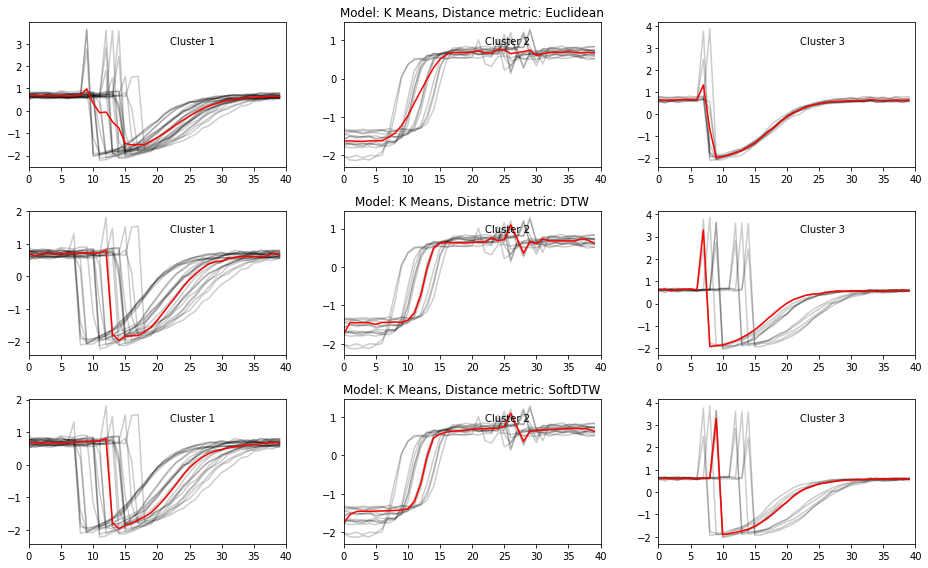

In [ ]:
from timexseries_clustering.data_visualization.functions import cluster_plot_matplotlib

clustering_plot = cluster_plot_matplotlib(timeseries_containers[0], timeseries_containers[0].models["k_means"])

### Website creation

In this section we will see how to build a simple Dash application which shows, in a graphical way, all the results we obtained in this notebook.
Note that to run in the Notebook you need the Jupyter-Dash extension, installed with Timex Clustering. Otherwise, simply copy the code and run it in a Python script (rembember to change "JupyterDash" to "Dash", when creating `app`!)

In [ ]:
# Imports
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from timexseries_clustering.data_visualization.functions import create_timeseries_dash_children
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

# Data visualization
children_for_each_timeseries = [{
    'name': s.approach,
    'children': create_timeseries_dash_children(s, param_config_kmeans)
} for s in timeseries_containers]  # This creates the Dash children, for each clustering approach (in this case just one!)

# Initialize Dash app.
app = JupyterDash(__name__)
# app = dash.Dash(__name__) Use this outside of Jupyter!

disclaimer = [html.Div([
    html.H1("Observation based Clustering example", style={'text-align': 'center'}),
    html.Hr(),
    html.Div([html.Img(src = 'https://raw.githubusercontent.com/uGR17/TIMEX_CLUSTERING/main/examples/figures/Politecnico-di-Milano.jpg', 
                       style = {'padding-top': '1%','height': '32%','width': '32%'})], style={'textAlign': 'center'}),
    html.H4(
        "Dashboard by the Intelligent Embedded Systems (IES) research group of the Politecnico di Milano, Italy",
        style={'text-align': 'center', 'top-margin': '25px'}),
    html.Hr(),
    dcc.Markdown('''
        Welcome to the monitoring and clustering dashboard! Provided by the Intelligent Embedded Systems (IES) research group of Politecnico di Milano, Italy.
        
        The dashboard relies on TIMEX CLUSTERING, a Python-based framework for automatic time series analysis developed by the IES research group.

        You can select the data to be visualized from the selector at the bottom of the page.

        For suggestions and questions contact:

        * Prof. Manuel Roveri - manuel.roveri@polimi.it
        
        * Ing. Alessandro Falcetta - alessandro.falcetta@polimi.it
        
        * Ing. Uriel Guadarrama - uriel.guadarrama@polimi.it
        '''),
    html.Br(),
    html.H2("Please select the clustering approach:")
    ], style={'width': '80%', 'margin': 'auto'}
    ), 
dcc.Dropdown(
    id='timeseries_selector',
    options=[{'label': i['name'], 'value': i['name']} for i in children_for_each_timeseries],
    value='Time-series'
), html.Div(id="timeseries_wrapper"), html.Div(dcc.Graph(), style={'display': 'none'})]

tree = html.Div(children=disclaimer, style={'width': '80%', 'margin': 'auto'})

app.layout = tree

@app.callback(
    Output(component_id='timeseries_wrapper', component_property='children'),
    [Input(component_id='timeseries_selector', component_property='value')]
)
def update_timeseries_wrapper(input_value):
    try:
        children = next(x['children'] for x in children_for_each_timeseries if x['name'] == input_value)
    except StopIteration:
        return html.Div(style={'padding': 200})

    return children

#app.run_server(port=10000)

# Run app and display result inline in the notebook
app.run_server(mode='external')#inline-external

<IPython.core.display.Javascript object>

## Comment on the results

There is an interesting comment to do on the performances of each clustering approahc. In the webpage, you will find the following plots, where you can select the clustering approach that you would like to analyze:

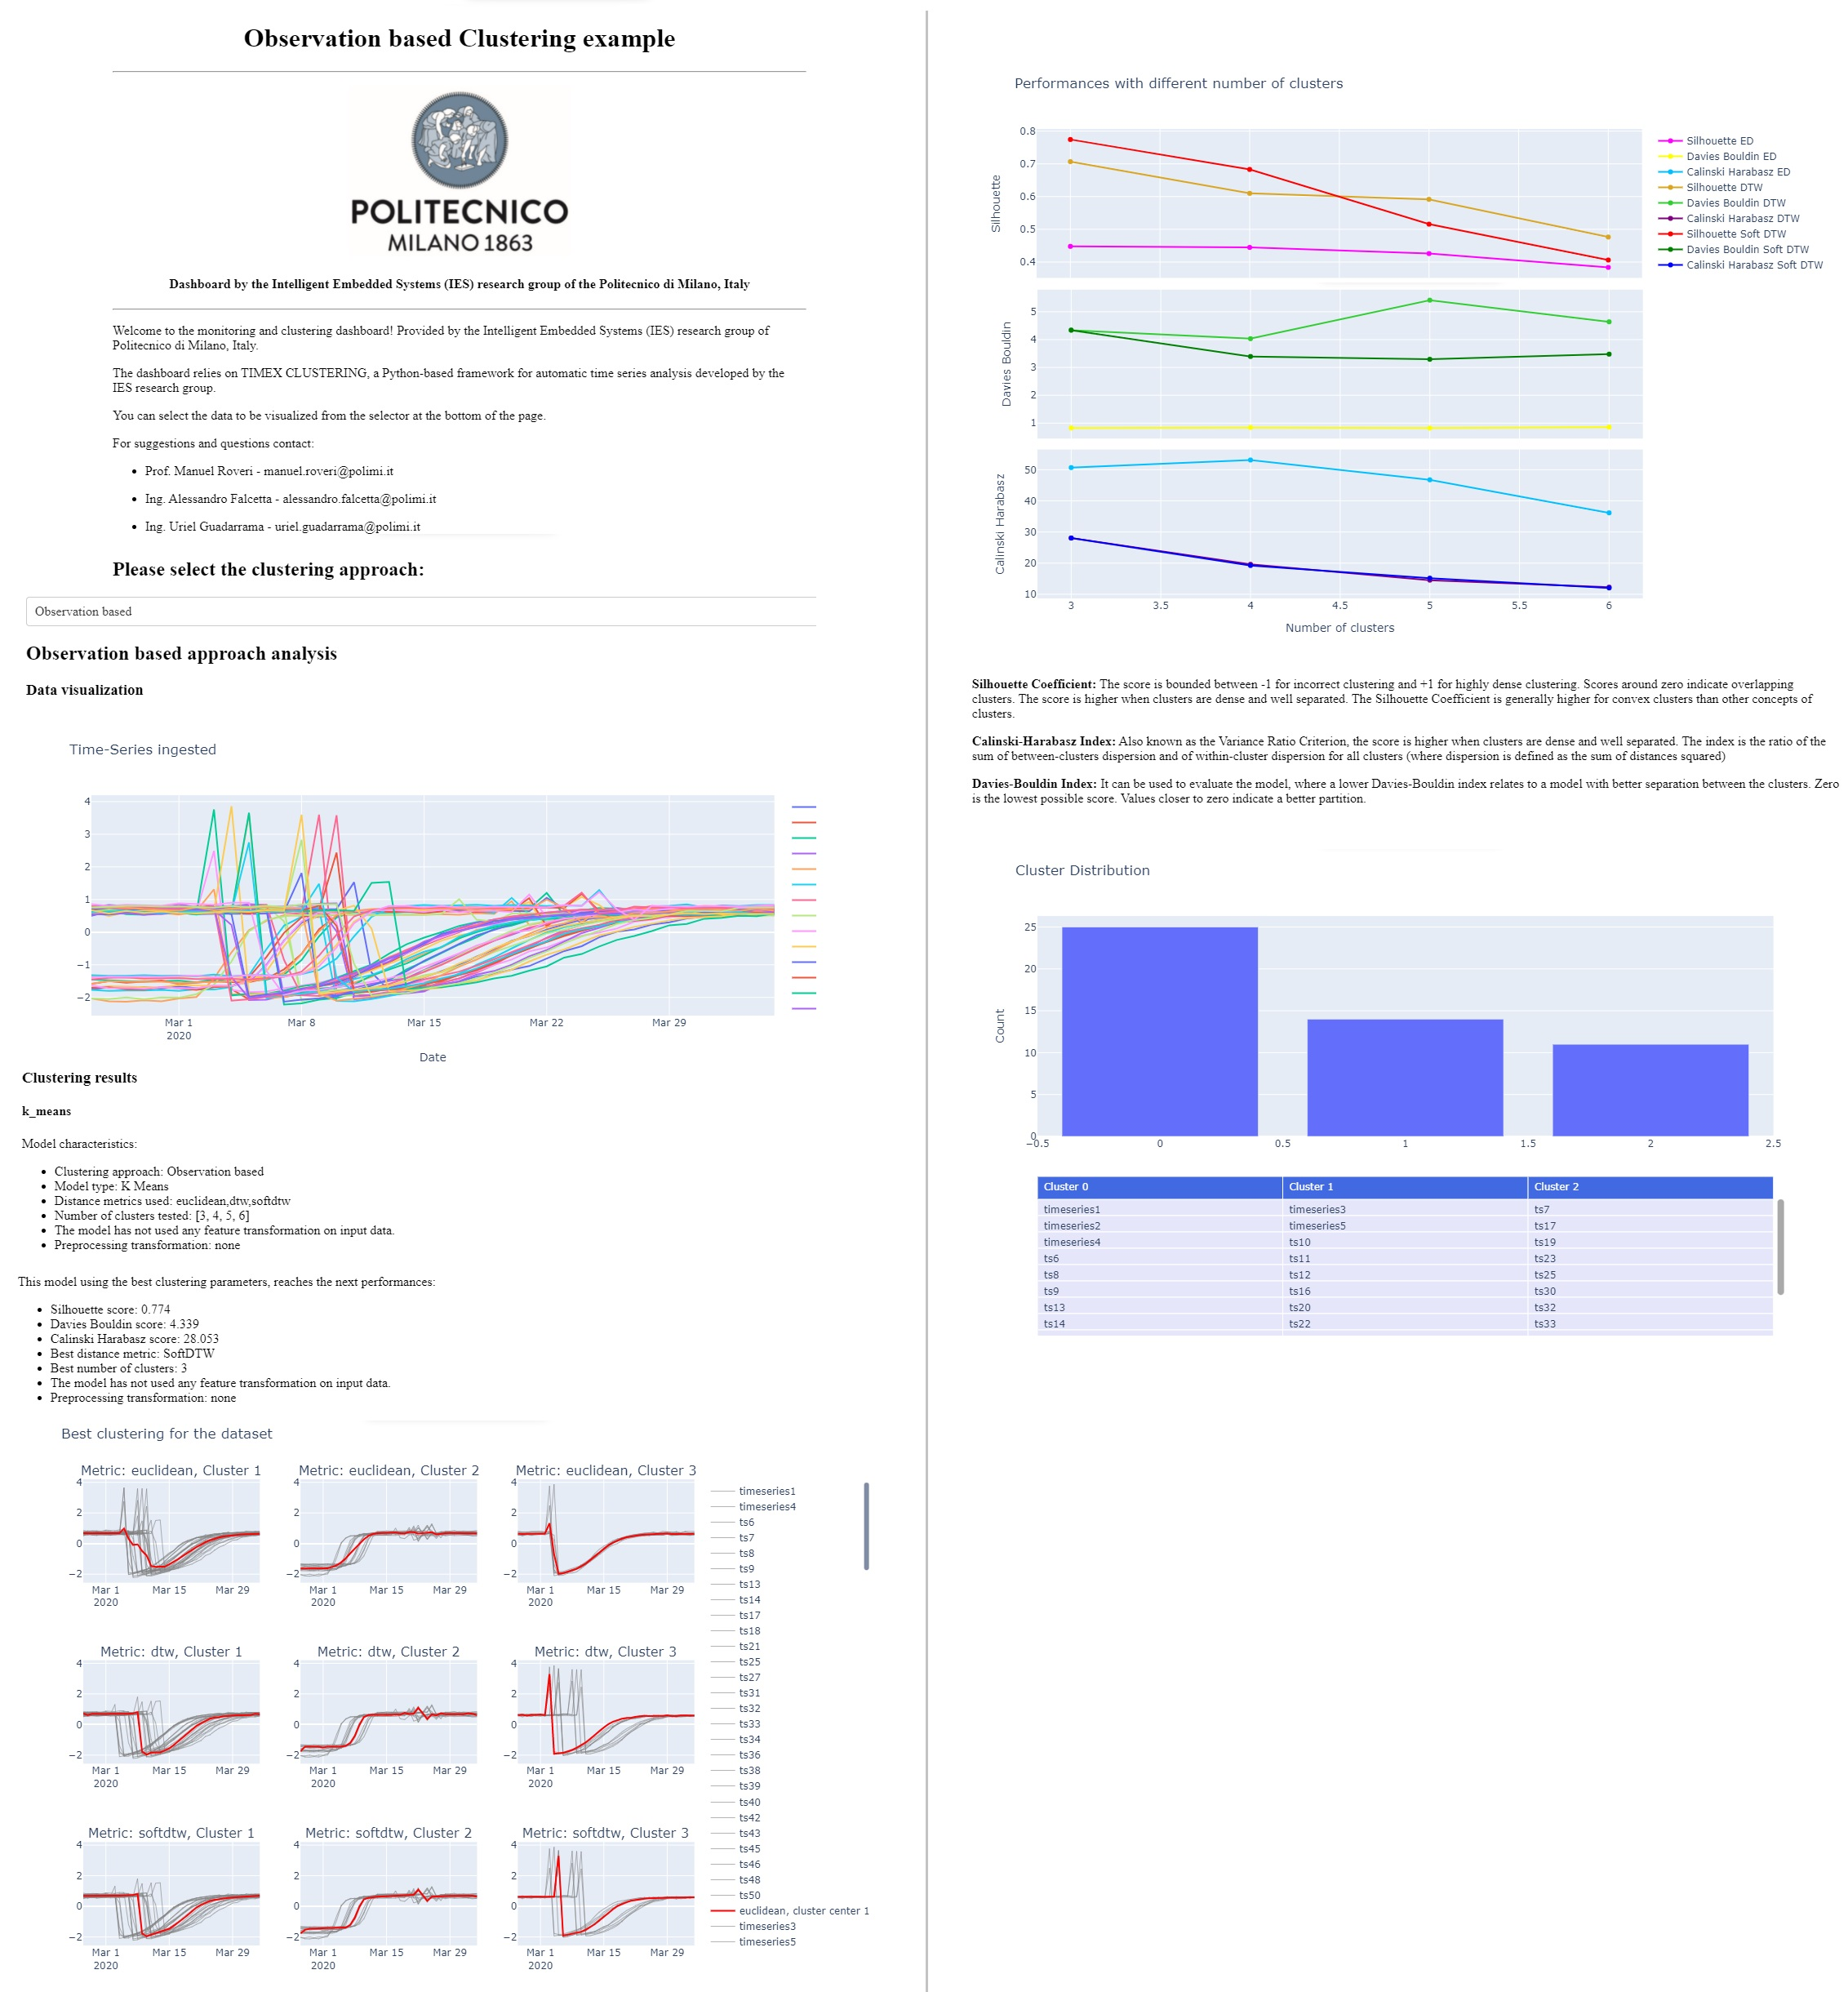

The best-performing approach was the Observation based clustering approach, using a K-Means clustering model, applying no data pre-transformation and employing soft-DTW as distance metric; this model settles that the best number of clusters to group the data is 3 and presents a silhouette score of 0.774, which is close to 1 indicating that the clusters are dense and well separated. 

On the other hand, the worst-performing approach was the Model based clustering, using Gaussian Mixture clustering models, applying no data pre-transformation and employing Log-Likelihood as distance metric; it presents a silhouette score of 0.216, which is closer to zero indicating an overlapping of the clusters.

It can be appreciated a much better clustering quality in the best performing model, because this model could better cluster the classes beforehand known. Indeed, it was described the behaviour of each class; the first class (Cluster 1 graph in the left side of the Figure) has a behavior that can be distinguished from the third class (Cluster 3 graph in the right side of the Figure) by the presence of a high frequency peak at the beginning of the transient; the second class (Cluster 2 graph in the middle of the Figure) has a different behavior with a small burst in the middle phase of the transient.

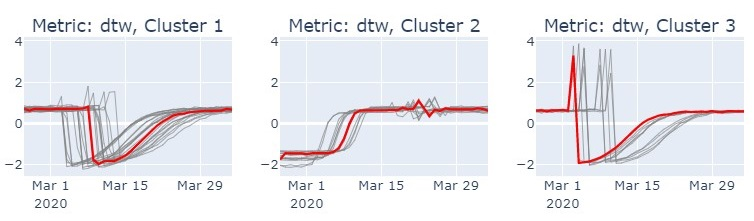

In comparison, the worst-performing model, Figure below, could not distinguish properly the behavior of these three clusters, result that can be corroborated with the silhouette score 0.774 in the best-performing model against a score of 0.216 in the worst-performing model, indicating that the final clusters results are dense and accurately separated.

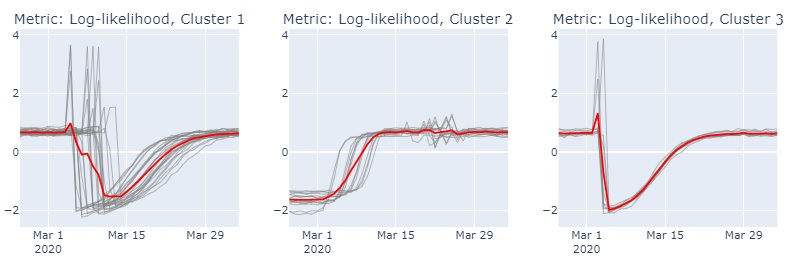